In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_30279_G')

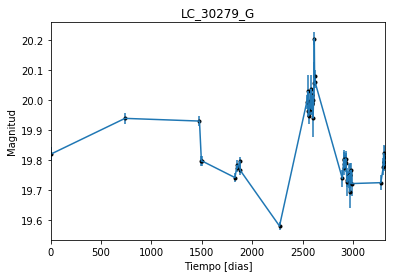

In [2]:
data = np.genfromtxt('LC_30279_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_30279_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

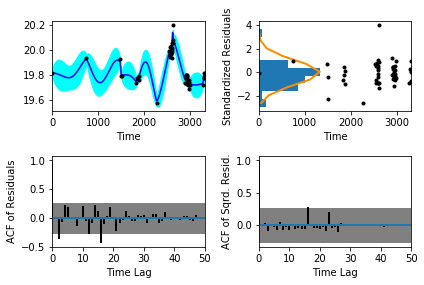

In [5]:
sample.assess_fit()

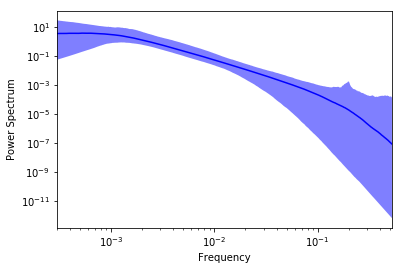

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_30279_G')

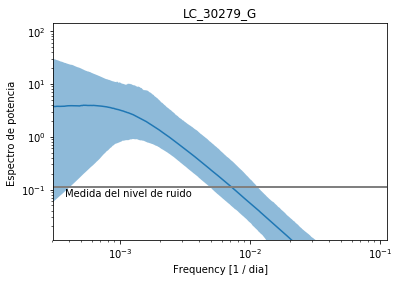

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_30279_G')

Text(0.5,1,'Prediccion , valor esperado LC_30279_G')

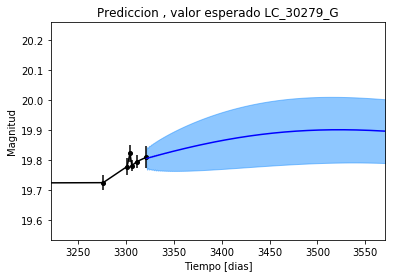

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_30279_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_30279_G')

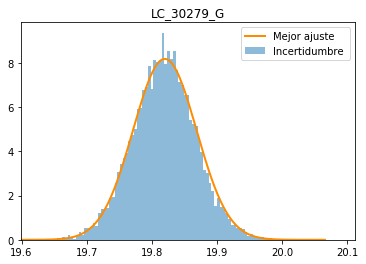

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_30279_G')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_G')

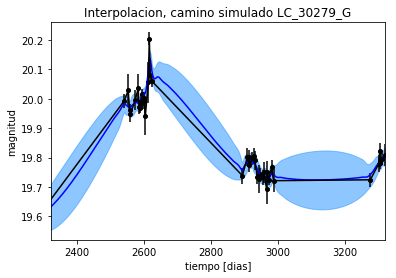

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_G')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_G')

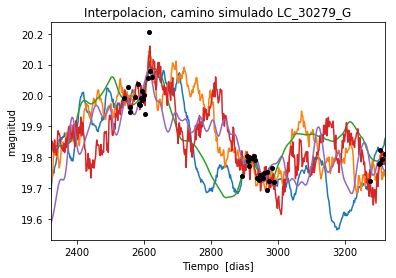

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1149.69192772
Median: 0.0384227503182
Standard deviation: 0.203626052604
68% credibility interval: [ 0.00410756  0.26129392]
95% credibility interval: [  4.47000653e-04   7.73131618e-01]
99% credibility interval: [  3.21559772e-04   9.83144746e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 332.48775132
Median: 0.0192341754563
Standard deviation: 0.13152476046
68% credibility interval: [ 0.00120654  0.12987362]
95% credibility interval: [  3.74737685e-04   4.85154627e-01]
99% credibility interval: [  3.17092110e-04   7.73131618e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 196.908910329
Median: 0.0415669136064
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2350.96326474
Median: 101.057148456
Standard deviation: 2.10684960335
68% credibility interval: [  98.81408116  102.87748889]
95% credibility interval: [  96.02281143  104.22666276]
99% credibility interval: [  93.99194755  104.72227956]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 223.343420169
Median: 1.16142236702
Standard deviation: 2.56002115647
68% credibility interval: [ 0.25726683  4.86698226]
95% credibility interval: [ 0.07190015  9.2763595 ]
99% credibility interval: [  0.02827287  11.79251633]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 458.413448848
Median: 3.17103819452
Standard deviation: 13.357663226
68% credibility interval: [  0.29162115  23.17423221]
95% credibility interval: [  2.60042728e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3126.69483444
Median: 2.05117804095e-11
Standard deviation: 4.26643446162e+126
68% credibility interval: [  1.81031878e-75   1.28509408e+98]
95% credibility interval: [  5.82233810e-116   1.00131559e+122]
99% credibility interval: [  6.07664370e-159   3.07461230e+126]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3545.8166916
Median: 19.8139964208
Standard deviation: 0.057155310778
68% credibility interval: [ 19.77198881  19.86413973]
95% credibility interval: [ 19.70269936  19.93712035]
99% credibility interval: [ 19.6332895  20.0136913]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 164.219073114
Median: 0.183576114679
Standard deviation: 0.31130360452
68% credibility interval: [ 0.          0.65461408]
95% credibility interval: [ 0.          0.99869225]
99% credibility interval: [ 0.          1.04216376]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 164.219073114
Median: 0.183576114679
Standard deviation: 0.31130360452
68% credibility interval: [ 0.          0.65461408]
95% credibility interval: [ 0.          0.99869225]
99% credibility interval: [ 0.          1.04216376]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3117.62800362
Median: 0.0
Standard deviation: 0.000636691499657
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2350.96326474
Median: 101.057148456
Standard deviation: 2.10684960335
68% credibility interval: [  98.81408116  102.87748889]
95% credibility interval: [  96.02281143  104.22666276]
99% credibility interval: [  93.99194755  104.72227956]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1796.73454666
Median: 0.019183450612
Standard deviation: 0.0161687601619
68% credibility interval: [ 0.01205948  0.03407403]
95% credibility interval: [ 0.00831827  0.06188763]
99% credibility interval: [ 0.00681423  0.09023139]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 822.749058564
Median: 1.04260628676
Standard deviation: 0.206833947591
68% credibility interval: [ 0.85907837  1.26137879]
95% credibility interval: [ 0.72365338  1.53479351]
99% credibility interval: [ 0.62873217  1.72700408]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 373.169276472
Median: 0.00168202898565
Standard deviation: 0.298337873025
68% credibility interval: [  1.52156888e-100   7.75464924e-002]
95% credibility interval: [  3.89198124e-125   8.31589571e-001]
99% credibility interval: [  1.85318216e-128   2.35503049e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1149.69192772
Median: (-0.241417260261-3.08875718066j)
Standard deviation: 2.33725628804
68% credibility interval: [-1.64175811+0.j        -0.02580857-0.1574183j]
95% credibility interval: [ -4.85772923e+00-5.77490991j  -2.80858793e-03-1.22676183j]
99% credibility interval: [ -6.17728062e+00+0.j          -2.02041964e-03-1.28113159j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 332.48775132
Median: (-0.120851888623+0.470231851887j)
Standard deviation: 2.1233884775
68% credibility interval: [-0.81602004+6.07748295j -0.00758092+0.j        ]
95% credibility interval: [ -3.04831642e+00+3.62839173j  -2.35454632e-03+1.19183888j]
99% credibility interval: [ -4.85772923e+00 +5.77490991e+00j  -1.99234848e-03 +3.42908740e-03j]